In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import time

from citipy import citipy
from datetime import datetime
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
# Create list for cities
cities = []

# Identify nearest city for lat and lng combos
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If city is unique, add to cities list
    if city not in cities:
        cities.append(city)
        
# Print city count to confirm sufficient count
len(cities)

604

In [23]:
# Create list to hold the weather data
city_data = []
# Begin logging data
print('Beginning Data Retrieval     ')
print('-----------------------------')

# Create counters
record_count = 1
set_count = 1

# Setup URL
url = 'https://api.openweathermap.org/data/2.5/weather?APPID=' + weather_api_key + '&units=imperial'

# Loop through all cities
for i, city in enumerate(cities):
    
    # Group cities in sets of 50
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + '&q=' + city.replace(' ', '+')
    
    # Log URL, record, set numbers and city
    print(f'Processing Record {record_count} or Set {set_count} | {city}')
    
    # Add 1 to record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse JSON and retrieve data
        city_weather = requests.get(city_url).json()
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # Convert date
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        # Append to city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    #If error, skip city
    except:
        print('City not found. Skipping...')
#         pass
    
# Indicate that Data loading is complete
print('-----------------------------')
print('Data Retrieval Complete      ')
print('-----------------------------')

Beginning Data Retrieval     
-----------------------------
Processing Record 1 or Set 1 | taolanaro
City not found. Skipping...
Processing Record 2 or Set 1 | chokurdakh
Processing Record 3 or Set 1 | hithadhoo
Processing Record 4 or Set 1 | viligili
City not found. Skipping...
Processing Record 5 or Set 1 | hilo
Processing Record 6 or Set 1 | la ronge
Processing Record 7 or Set 1 | busselton
Processing Record 8 or Set 1 | kapaa
Processing Record 9 or Set 1 | rikitea
Processing Record 10 or Set 1 | port elizabeth
Processing Record 11 or Set 1 | geraldton
Processing Record 12 or Set 1 | mys shmidta
City not found. Skipping...
Processing Record 13 or Set 1 | hebi
Processing Record 14 or Set 1 | kaitangata
Processing Record 15 or Set 1 | stade
Processing Record 16 or Set 1 | albany
Processing Record 17 or Set 1 | portland
Processing Record 18 or Set 1 | carnarvon
Processing Record 19 or Set 1 | bambous virieux
Processing Record 20 or Set 1 | pangody
Processing Record 21 or Set 1 | yellow

Processing Record 39 or Set 4 | ilulissat
Processing Record 40 or Set 4 | rawson
Processing Record 41 or Set 4 | georgetown
Processing Record 42 or Set 4 | barrow
Processing Record 43 or Set 4 | ostrovnoy
Processing Record 44 or Set 4 | qasigiannguit
Processing Record 45 or Set 4 | north bend
Processing Record 46 or Set 4 | bilma
Processing Record 47 or Set 4 | saint-philippe
Processing Record 48 or Set 4 | qaqortoq
Processing Record 49 or Set 4 | ouro preto
Processing Record 50 or Set 4 | batie
Processing Record 1 or Set 5 | alofi
Processing Record 2 or Set 5 | thinadhoo
Processing Record 3 or Set 5 | pingliang
Processing Record 4 or Set 5 | ixtapa
Processing Record 5 or Set 5 | syracuse
Processing Record 6 or Set 5 | west wendover
Processing Record 7 or Set 5 | kodiak
Processing Record 8 or Set 5 | roald
Processing Record 9 or Set 5 | tsihombe
City not found. Skipping...
Processing Record 10 or Set 5 | novokayakent
Processing Record 11 or Set 5 | nador
Processing Record 12 or Set 5 |

City not found. Skipping...
Processing Record 28 or Set 8 | forbes
Processing Record 29 or Set 8 | andenes
Processing Record 30 or Set 8 | zhongshu
Processing Record 31 or Set 8 | mahajanga
Processing Record 32 or Set 8 | kedrovyy
Processing Record 33 or Set 8 | stephenville
Processing Record 34 or Set 8 | sisimiut
Processing Record 35 or Set 8 | rungata
City not found. Skipping...
Processing Record 36 or Set 8 | cheuskiny
City not found. Skipping...
Processing Record 37 or Set 8 | vila franca do campo
Processing Record 38 or Set 8 | karauzyak
City not found. Skipping...
Processing Record 39 or Set 8 | bubaque
Processing Record 40 or Set 8 | barberton
Processing Record 41 or Set 8 | haradok
Processing Record 42 or Set 8 | burnie
Processing Record 43 or Set 8 | gornji milanovac
Processing Record 44 or Set 8 | la rioja
Processing Record 45 or Set 8 | clyde river
Processing Record 46 or Set 8 | ngukurr
City not found. Skipping...
Processing Record 47 or Set 8 | auki
Processing Record 48 o

Processing Record 17 or Set 12 | whitianga
Processing Record 18 or Set 12 | nizhniy odes
Processing Record 19 or Set 12 | bondo
Processing Record 20 or Set 12 | tabiauea
City not found. Skipping...
Processing Record 21 or Set 12 | saint-georges
Processing Record 22 or Set 12 | upington
Processing Record 23 or Set 12 | hami
Processing Record 24 or Set 12 | nishihara
Processing Record 25 or Set 12 | albania
Processing Record 26 or Set 12 | bourail
Processing Record 27 or Set 12 | huilong
Processing Record 28 or Set 12 | wulanhaote
City not found. Skipping...
Processing Record 29 or Set 12 | sumbe
Processing Record 30 or Set 12 | oyonnax
Processing Record 31 or Set 12 | lorengau
Processing Record 32 or Set 12 | vengerovo
Processing Record 33 or Set 12 | mana
Processing Record 34 or Set 12 | neman
Processing Record 35 or Set 12 | razdolinsk
Processing Record 36 or Set 12 | darab
Processing Record 37 or Set 12 | uran
Processing Record 38 or Set 12 | do gonbadan
Processing Record 39 or Set 1

In [26]:
# Convert the array of dictionaries to DF
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.6333,147.9167,16.29,97,97,4.83,RU,2022-10-05 19:22:55
1,Hithadhoo,-0.6000,73.0833,82.40,73,100,17.56,MV,2022-10-05 19:22:56
2,Hilo,19.7297,-155.0900,85.28,74,40,3.44,US,2022-10-05 19:22:57
3,La Ronge,55.1001,-105.2842,43.02,45,40,6.91,CA,2022-10-05 19:22:57
4,Busselton,-33.6500,115.3333,49.48,60,18,9.91,AU,2022-10-05 19:22:58
5,Kapaa,22.0752,-159.3190,80.58,87,100,5.75,US,2022-10-05 19:21:29
6,Rikitea,-23.1203,-134.9692,69.57,59,0,21.23,PF,2022-10-05 19:22:59
7,Port Elizabeth,-33.9180,25.5701,61.32,85,40,9.22,ZA,2022-10-05 19:23:00
8,Geraldton,-28.7667,114.6000,54.01,87,75,6.91,AU,2022-10-05 19:23:00
9,Hebi,35.8992,114.1925,49.57,65,92,3.44,CN,2022-10-05 19:23:02


In [27]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [28]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chokurdakh,RU,2022-10-05 19:22:55,70.6333,147.9167,16.29,97,97,4.83
1,Hithadhoo,MV,2022-10-05 19:22:56,-0.6000,73.0833,82.40,73,100,17.56
2,Hilo,US,2022-10-05 19:22:57,19.7297,-155.0900,85.28,74,40,3.44
3,La Ronge,CA,2022-10-05 19:22:57,55.1001,-105.2842,43.02,45,40,6.91
4,Busselton,AU,2022-10-05 19:22:58,-33.6500,115.3333,49.48,60,18,9.91
5,Kapaa,US,2022-10-05 19:21:29,22.0752,-159.3190,80.58,87,100,5.75
6,Rikitea,PF,2022-10-05 19:22:59,-23.1203,-134.9692,69.57,59,0,21.23
7,Port Elizabeth,ZA,2022-10-05 19:23:00,-33.9180,25.5701,61.32,85,40,9.22
8,Geraldton,AU,2022-10-05 19:23:00,-28.7667,114.6000,54.01,87,75,6.91
9,Hebi,CN,2022-10-05 19:23:02,35.8992,114.1925,49.57,65,92,3.44


In [30]:
# Create output file (CSV)
output_data_file = 'weather_data/cities.csv'
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [5]:
# Reload CSV
city_data_df = pd.read_csv('weather_data/cities.csv')

city_data_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Chokurdakh,RU,2022-10-05 19:22:55,70.6333,147.9167,16.29,97,97,4.83
1,1,Hithadhoo,MV,2022-10-05 19:22:56,-0.6000,73.0833,82.40,73,100,17.56
2,2,Hilo,US,2022-10-05 19:22:57,19.7297,-155.0900,85.28,74,40,3.44
3,3,La Ronge,CA,2022-10-05 19:22:57,55.1001,-105.2842,43.02,45,40,6.91
4,4,Busselton,AU,2022-10-05 19:22:58,-33.6500,115.3333,49.48,60,18,9.91
5,5,Kapaa,US,2022-10-05 19:21:29,22.0752,-159.3190,80.58,87,100,5.75
6,6,Rikitea,PF,2022-10-05 19:22:59,-23.1203,-134.9692,69.57,59,0,21.23
7,7,Port Elizabeth,ZA,2022-10-05 19:23:00,-33.9180,25.5701,61.32,85,40,9.22
8,8,Geraldton,AU,2022-10-05 19:23:00,-28.7667,114.6000,54.01,87,75,6.91
9,9,Hebi,CN,2022-10-05 19:23:02,35.8992,114.1925,49.57,65,92,3.44


In [6]:
# Extract relevant fields from the DF
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

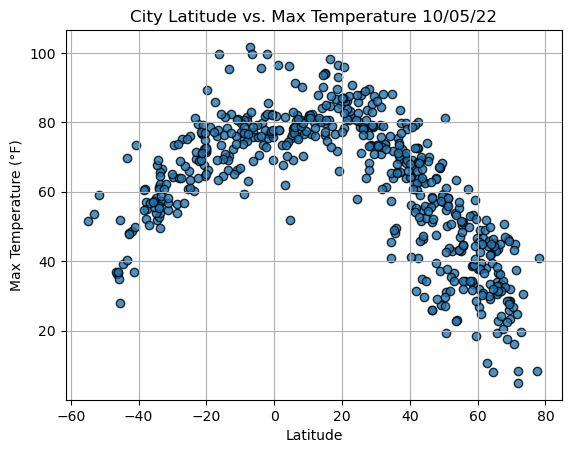

In [9]:
import time

# Build scatter plot for lat vs. max temp
plt.scatter(lats,
            max_temps,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label="Cities")

# Graph properties
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (°F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save figure
plt.savefig('weather_data/Fig1.png')

plt.show()

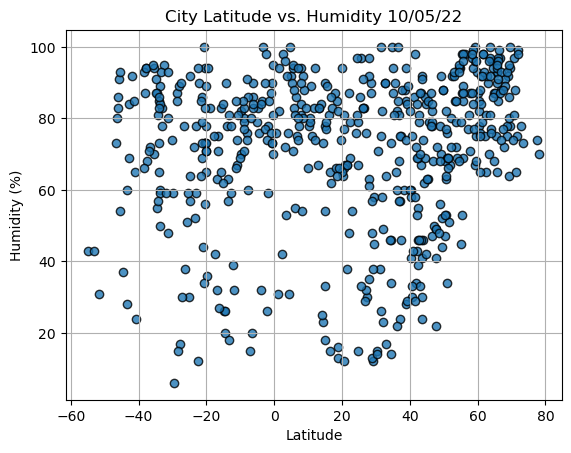

In [10]:
# Build scatter plot for lat vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label="Cities")

# Graph properties
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save figure
plt.savefig('weather_data/Fig2.png')

plt.show()

In [ ]:
# Build scatter plot for lat vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label="Cities")

# Graph properties
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%))')
plt.xlabel('Latitude')
plt.grid(True)

# Save figure
plt.savefig('weather_data/Fig3.png')

plt.show()